Methods to generate plots for static accuracy / misalignment experiments

In [2]:
from analysis import bender_class, train_test_split
from config import path_to_repository
import pandas as pd
import os
import numpy as np

### Misalignment datasets

Start by plotting curves / accuracy for all datasets individually 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized with initial value R₀: -103.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized with initial value R₀: -101.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized with initial value R₀: -103.0


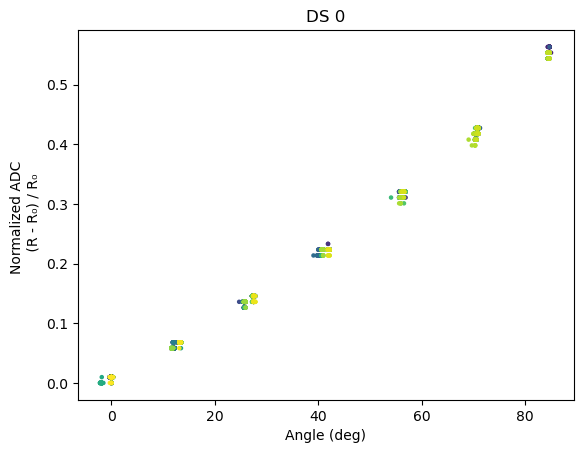

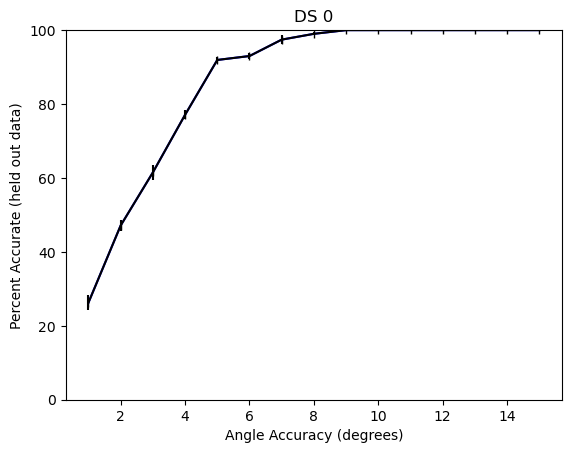

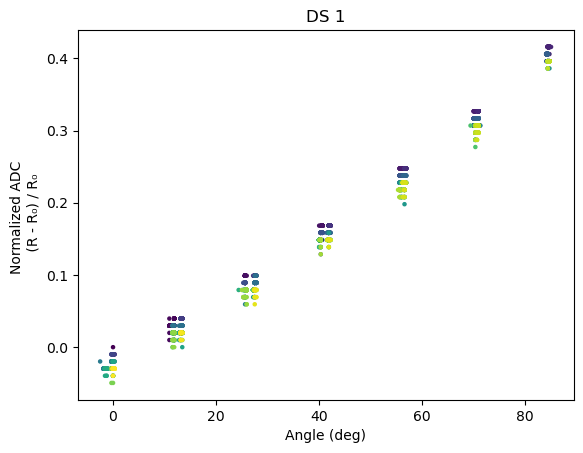

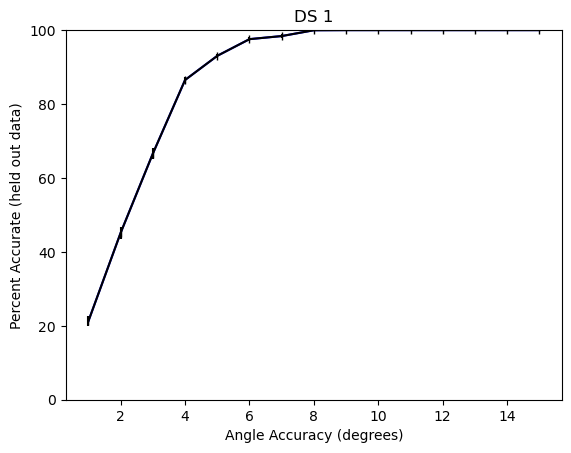

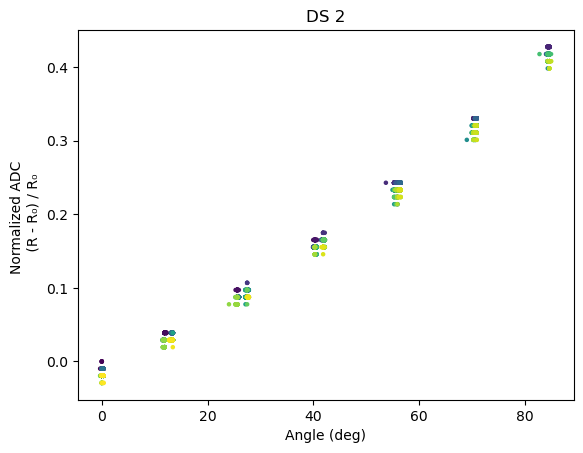

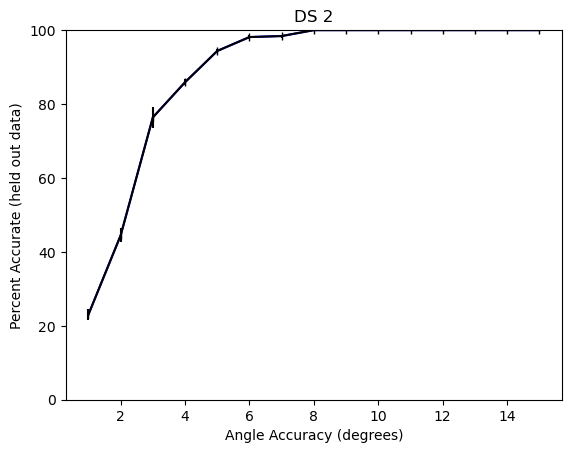

In [4]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv")


DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

Using normalize_adc_bw_01():: Now fit model on dataset 1 and test on dataset 2 and 3 etc. 

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs_1p93_0deg_12_18_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/20 deg\\Bending_data_abs_1p93_20deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/8 deg\\Bending_data_abs_1p93_8deg_12_12_24.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/12_18_2024/misalignment/0 deg\\Bending_data_abs

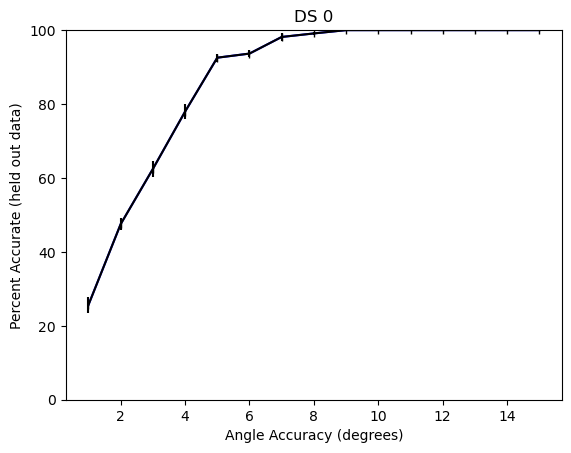

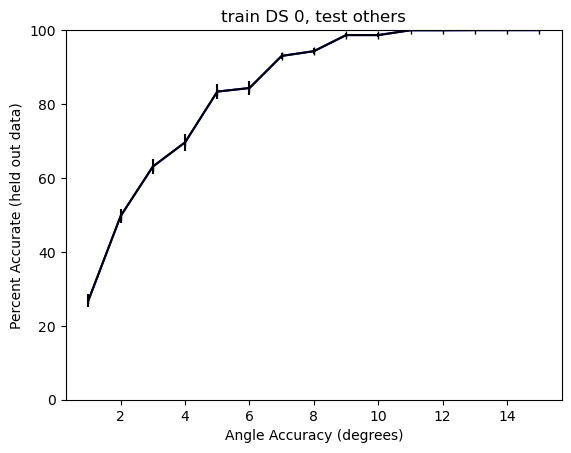

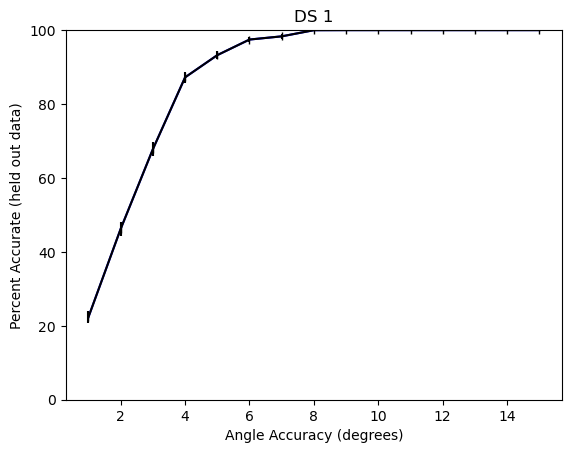

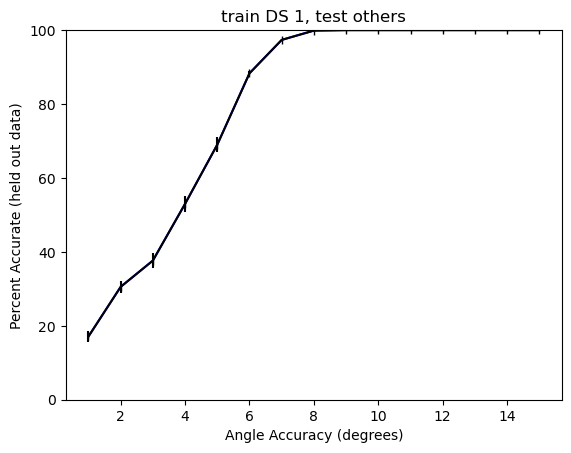

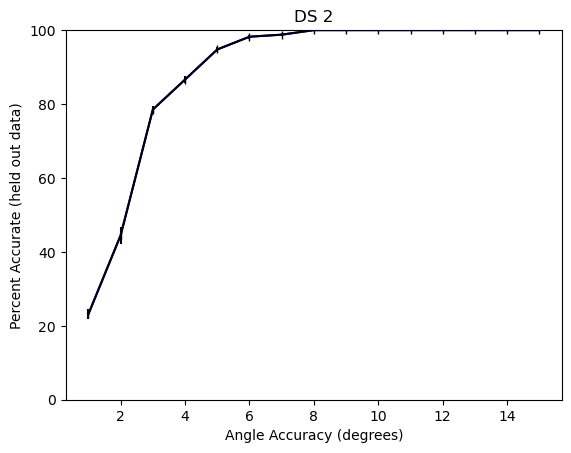

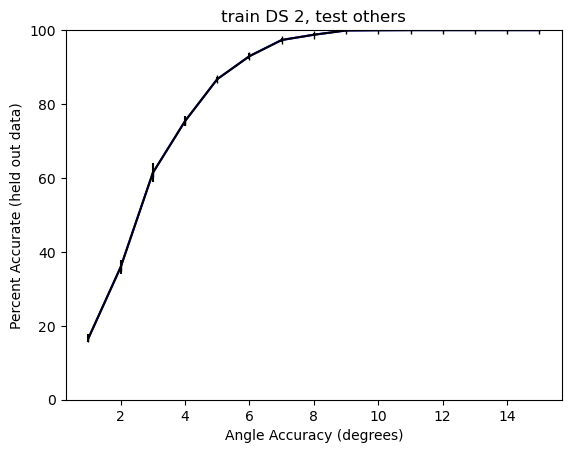

In [6]:
# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_bw_01()
    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

    ## Now test data on other datasets
    ixs = [0, 1, 2]
    ixs.remove(i_d)
    
    ## Iterate over other datasets 
    g2 = bender_class()
    g2.load_data(DS_all[ixs[0]])
    g2.normalize_adc_bw_01()
    g3 = bender_class()
    g3.load_data(DS_all[ixs[1]])
    g3.normalize_adc_bw_01()
   

    df_combined = pd.concat([g2.data, g3.data], ignore_index=True)

    acc = []; 
    for i in range(10): 
        _, dftest = train_test_split(df_combined, test_size=0.1, shuffle=True)
        acc.append(g.predict_new_data(dftest))
    acc = np.vstack((acc))
    
    g.plot_accuracy(title='train DS %d, test others'%i_d, accuracy=acc)


### 2_11_2025

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized with initial value R₀: -140.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p732_8deg_2_11_25.csv']
ADC normalized with initial value R₀: -137.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/20 deg\\Bending_data_abs_1p732_20deg_2_11_25.csv']
ADC normalized with initial value R₀: -169.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p758\\Bending_data_abs_1p7_abs_1p758_1st_reapply_2_6_25.csv']
ADC normalized with initial value R₀: -92.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg/1p758\\Bending_data_abs_1p758_8

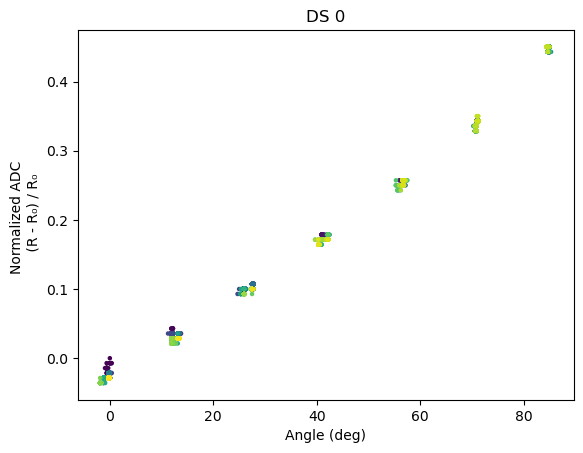

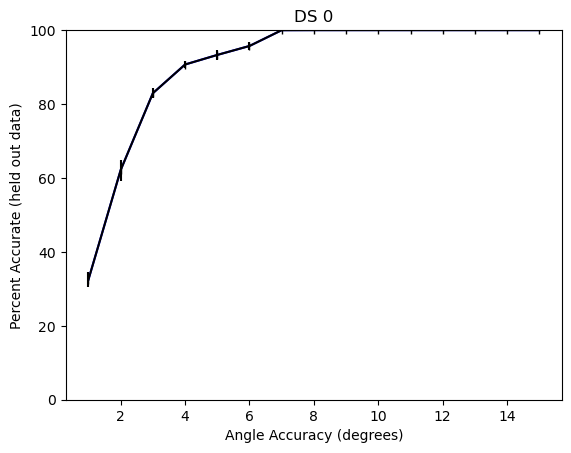

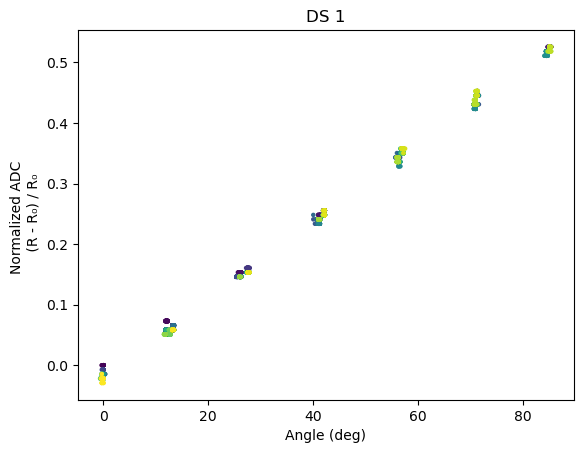

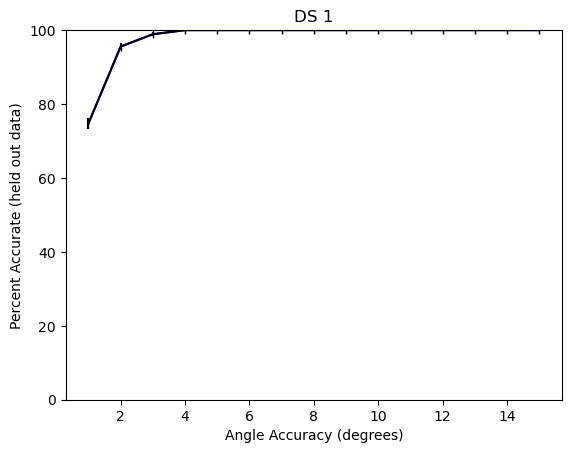

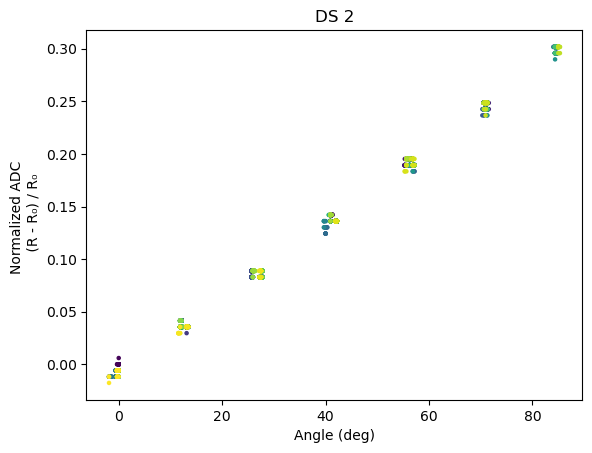

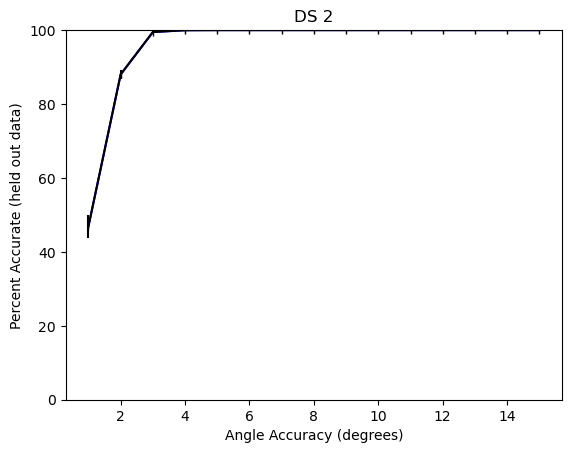

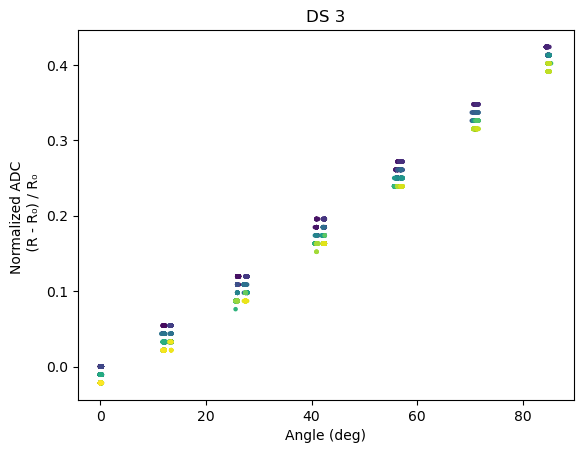

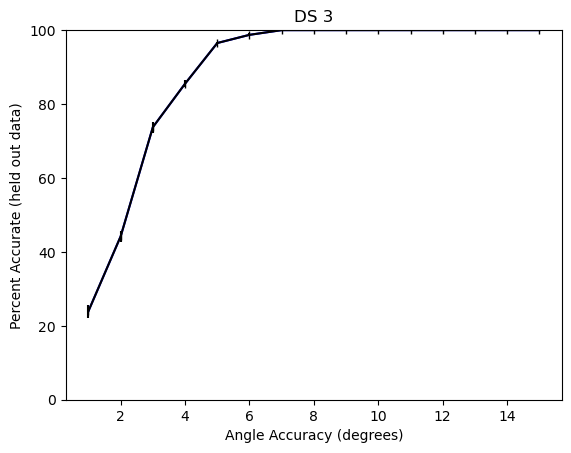

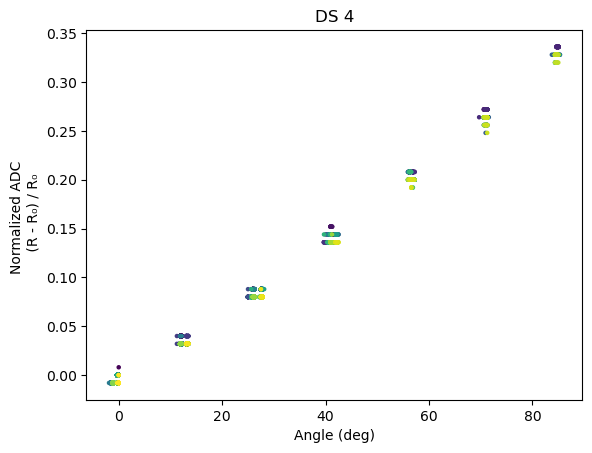

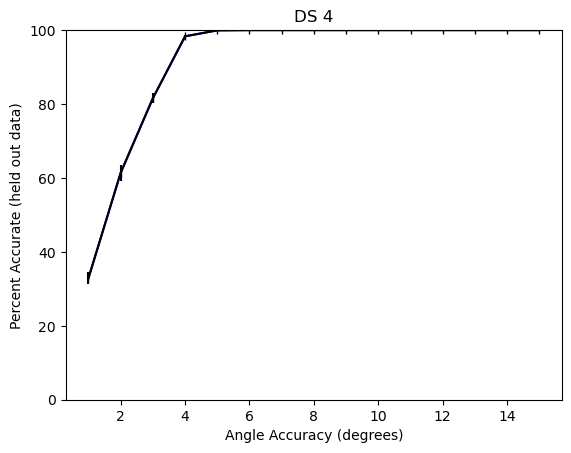

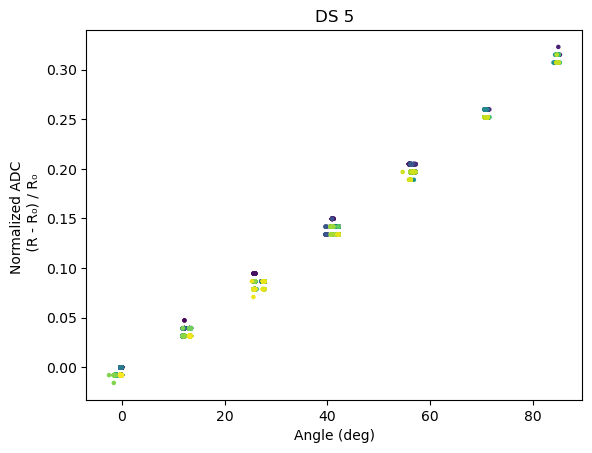

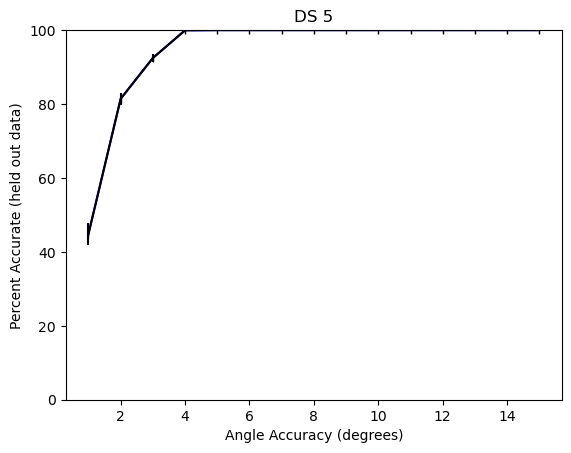

In [8]:
DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/*.csv")

#took abs_1p758_1st_reapply sample from 2_6_25 to test for misalignment.  0 degree data take from 1st application dataset.
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p758/*.csv")
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/1p758/*.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/1p758/*.csv")




DS_all = [DS1_datafiles, DS2_datafiles, DS3_datafiles, DS4_datafiles, DS5_datafiles, DS6_datafiles]

# For each dataset -- show training and testing on individual datasets
for i_d, datafiles in enumerate(DS_all):
    g = bender_class()
    g.load_data(datafiles)
    g.normalize_adc_over_R0()
    g.plot_data(scatter=True, title='DS %d'%i_d)

    g.train_model_test_accuracy()
    g.plot_accuracy(title='DS %d'%i_d)

### Figure Bar Plot min angle where accuracy 100

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p732_8deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/20 deg\\Bending_data_abs_1p732_20deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p

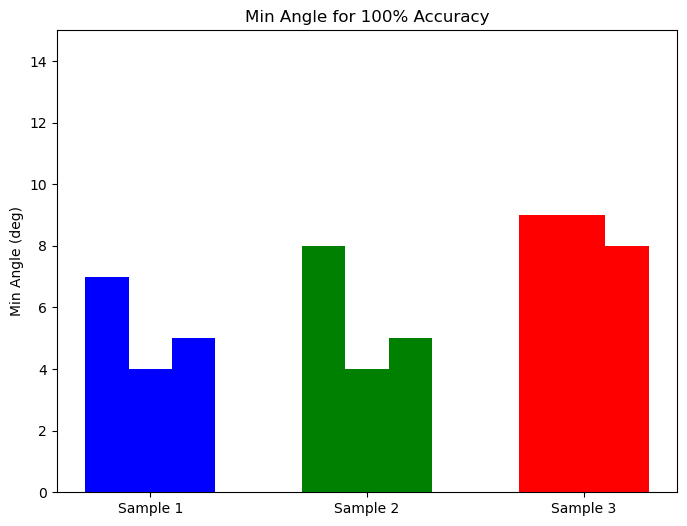

In [16]:
# first misalignment data

DS1_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/*.csv")

group_1 = [DS1_datafiles, DS2_datafiles, DS3_datafiles]


# second misalignment data

#took abs_1p758_1st_reapply sample from 2_6_25 to test for misalignment.  0 degree data take from 1st application dataset.
DS4_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p758/*.csv")
DS5_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/1p758/*.csv")
DS6_datafiles = os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/1p758/*.csv")

group_2 = [DS1_datafiles, DS2_datafiles, DS3_datafiles]


# Third misalignment data

DS1_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")
DS2_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")
DS3_datafiles = os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv")

group_3 = [DS1_datafiles, DS2_datafiles, DS3_datafiles]



ma_100_list = []  # Will hold lists of values per group

for group in [group_1, group_2, group_3]:  # Loop over groups
    group_values = []
    for datafiles in group:  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy()
        min_angle_100, min_acc = g.get_min_accuracy_100()
        group_values.append(min_angle_100)  # Collect values per group
    ma_100_list.append(group_values)  # Append each group’s results as a sublist

print(ma_100_list)

bar_labels = ['Sample 1', 'Sample 2', 'Sample 3']

colors = ["b", "g", "r"]  # Assign different colors to different groups

g.plot_bar_chart(ma_100_list, 
               bar_labels, 
               title="Min Angle for 100% Accuracy", 
               ylabel="Min Angle (deg)", 
               colors=colors,
               ylim=(0, 15))

###  box plot of angular error: Box Plot where one box corresponds to angular error from testing data from single dataset.

['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p732_8deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/20 deg\\Bending_data_abs_1p732_20deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p

C:\Users\toppe\OneDrive - CSU Maritime Academy\Documents\GitHub\Strain-Sensor-\Code\analysis\analysis.py:828: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(


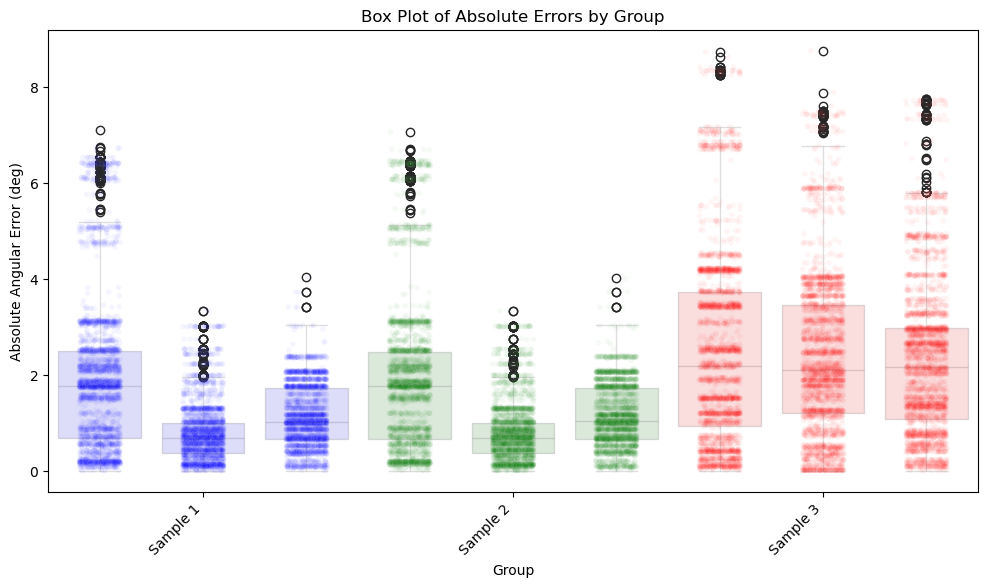

In [19]:
ma_100_list = []  # Will hold lists of min angle values per group
error_data_dict = {}  # Dictionary for box plot: {sample_name: error_values}
group_dict = {}  # Dictionary to map samples to groups

group_names = ['Group 1', 'Group 2', 'Group 3']
bar_labels = ['Sample 1', 'Sample 2', 'Sample 3']
group_colors = ["b", "g", "r"]  # Assign different colors to different groups

for i, group in enumerate([group_1, group_2, group_3]):  # Loop over groups
    group_values = []  # Holds min angle values per group

    for j, datafiles in enumerate(group):  # Loop over datasets in each group
        g = bender_class()
        g.load_data(datafiles)
        g.normalize_adc_bw_01()
        g.train_model_test_accuracy()
        
        # Get min accuracy values (for bar chart)
        min_angle_100, min_acc = g.get_min_accuracy_100()
        group_values.append(min_angle_100)  # Collect values per group
        
        # Use cross_validation_angular_error to get error data
        mean_error, std_error, predictions_df = g.cross_validation_angular_error()

        if not isinstance(predictions_df, pd.DataFrame):
            raise TypeError(f"Expected cross_validation_angular_error to return a DataFrame, got {type(predictions_df)}")

        # Ensure the DataFrame contains the 'Absolute Error' column
        if "Absolute Error" not in predictions_df.columns:
            raise ValueError(f"Dataset from {datafiles} does not contain 'Absolute Error' column")

        # Assign unique sample names and store error values
        sample_name = f"Group{i+1}_Sample{j+1}"  
        error_data_dict[sample_name] = predictions_df['Absolute Error'].tolist()
        group_dict[sample_name] = group_names[i]  # Assign to group

    ma_100_list.append(group_values)  # Append each group’s results as a sublist

    
g.plot_box_plot(error_data_dict, group_dict, group_colors, bar_labels,  box_alpha=0.15, data_alpha=0.04, jitter=0.2)


    


### Use one dataset to train model and apply to others.  Obtain min accuracy plot as well as pair wise accuracy plot

In [22]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split


%matplotlib tk

# Define dataset paths with names
DS_all = [
    ("DS1", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")),
    ("DS2", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/*.csv")),
    ("DS3", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/*.csv")),
    ("DS4", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p758/*.csv")),
    ("DS5", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/1p758/*.csv")),
    ("DS6", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/1p758/*.csv")),
    ("DS7", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")),
    ("DS8", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")),
    ("DS9", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv"))
]

# Initialize results list
results = []

# Iterate over each dataset as the training dataset
for i, (train_name, train_datafiles) in enumerate(DS_all):
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()

    # Train the model before testing (for off-diagonal cases)
    g.train_model_test_accuracy()

    for j, (test_name, test_datafiles) in enumerate(DS_all):
        
        # Diagonal Case (Within-Sample Testing)
        if i == j:
            acc = []

            # Store original dataset before modifying `g.data`
            original_data = g.data.copy()

            for _ in range(10):
                df_train, df_test = train_test_split(original_data, test_size=0.2, shuffle=True, random_state=42)
                
                # Temporarily overwrite `g.data` for training
                g.data = df_train  
                g.train_model_test_accuracy()  # Train model explicitly
                
                acc.append(g.predict_new_data(df_test))  # Test on 20%

            # Restore `g.data` for further use
            g.data = original_data

        # Off-Diagonal Case (Cross-Sample Testing)
        else:
            # Load test dataset separately
            g_test = bender_class()
            g_test.load_data(test_datafiles)  
            g_test.normalize_adc_bw_01()
            df_test = g_test.data

            # Run multiple accuracy tests
            acc = np.array([
                g.predict_new_data(train_test_split(df_test, test_size=0.1, shuffle=True, random_state=42)[1])
                for _ in range(10)
            ])

        # Compute Min Angle for Accuracy 100%
        min_angle_100, _ = g.get_min_accuracy_100(accuracy_matrix=np.vstack(acc)) or (np.nan, None)

        # Store results correctly for both diagonal and off-diagonal cases
        results.append({
            "train_dataset": train_name,
            "test_dataset": test_name,
            "min_angle_100": min_angle_100
        })

# Convert results to Pandas DataFrame
df_results = pd.DataFrame(results)

# Debugging: Check if the dataframe has all expected rows (N x N)
expected_size = len(DS_all) ** 2
actual_size = len(df_results)
if actual_size != expected_size:
    print(f"WARNING: Expected {expected_size} rows, but got {actual_size}. Something went wrong!")

label = "Min Angle where Accuracy = 100%"

# Define dataset groups
group_dict = {
    "DS1": "Group 1", "DS2": "Group 1", "DS3": "Group 1", 
     "DS4": "Group 2", "DS5": "Group 2", "DS6": "Group 2", 
    "DS7": "Group 3", "DS8": "Group 3", "DS9": "Group 3"
}

# Define colors for each group outline
group_colors = {
    "Group 1": "blue",
    "Group 2": "green",
    "Group 3": "red"
}

# Call the method with group info
g.plot_pairwise_min_angle_heatmap(df_results, group_dict, group_colors, label)


['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p732_8deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/20 deg\\Bending_data_abs_1p732_20deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p758\\Bending_data_abs_1p7_abs_1p758_1st_reapply_2_6_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg/1p758\

### same plot as above but now using mean angular error

In [25]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# Define dataset paths with names

# Define dataset paths with names
DS_all = [
    ("DS1", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p732/*.csv")),
    ("DS2", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/*.csv")),
    ("DS3", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/*.csv")),
    ("DS4", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/0 deg/1p758/*.csv")),
    ("DS5", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/8 deg/1p758/*.csv")),
    ("DS6", os.path.join(path_to_repository , "CSV Data/2_11_25/misalignment/20 deg/1p758/*.csv")),
    ("DS7", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/0 deg/*.csv")),
    ("DS8", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/8 deg/*.csv")),
    ("DS9", os.path.join(path_to_repository , "CSV Data/12_18_2024/misalignment/20 deg/*.csv"))
]

# Initialize results list
results = []

# Iterate over each dataset as the training dataset
for i, (train_name, train_datafiles) in enumerate(DS_all):
    g = bender_class()
    g.load_data(train_datafiles)
    g.normalize_adc_bw_01()

    # Train the model before testing (for off-diagonal cases)
    mean_error_train, std_error_train, _ = g.cross_validation_angular_error()

    for j, (test_name, test_datafiles) in enumerate(DS_all):
        
        # Diagonal Case (Within-Sample Testing)
        if i == j:
            acc = []

            # Store original dataset before modifying `g.data`
            original_data = g.data.copy()

            for _ in range(10):
                df_train, df_test = train_test_split(original_data, test_size=0.2, shuffle=True, random_state=42)
                
                # Temporarily overwrite `g.data` for training
                g.data = df_train  
                g.train_model_test_accuracy()  # Train model explicitly
                
                # Compute mean angular error for self-testing
                mean_error, std_error, _ = g.cross_validation_angular_error()

                acc.append(mean_error)  

            # Compute average mean error over 10 trials
            mean_error = np.mean(acc)

            # Restore `g.data` for further use
            g.data = original_data

        # Off-Diagonal Case (Cross-Sample Testing)
        else:
            # Load test dataset separately
            g_test = bender_class()
            g_test.load_data(test_datafiles)  
            g_test.normalize_adc_bw_01()

            # Compute mean angular error for cross-dataset testing
            mean_error, std_error, _ = g_test.cross_validation_angular_error()

        # Store results correctly for both diagonal and off-diagonal cases
        results.append({
            "train_dataset": train_name,
            "test_dataset": test_name,
            "mean_error": mean_error
        })

# Convert results to Pandas DataFrame
df_results = pd.DataFrame(results)

# Debugging: Check if the dataframe has all expected rows (N x N)
expected_size = len(DS_all) ** 2
actual_size = len(df_results)
if actual_size != expected_size:
    print(f"WARNING: Expected {expected_size} rows, but got {actual_size}. Something went wrong!")



# Define dataset groups
group_dict = {
    "DS1": "Group 1", "DS2": "Group 1", "DS3": "Group 1", 
     "DS4": "Group 2", "DS5": "Group 2", "DS6": "Group 2", 
    "DS7": "Group 3", "DS8": "Group 3", "DS9": "Group 3"
}

# Define colors for each group outline
group_colors = {
    "Group 1": "blue",
    "Group 2": "green",
    "Group 3": "red"
}
label = "Mean Angle Error (deg)"


# Call the method with the computed results
g.plot_pairwise_mean_error_heatmap(df_results, group_dict, group_colors, label)





['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p732\\Bending_data_abs_1p732_0deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg\\Bending_data_abs_1p732_8deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/20 deg\\Bending_data_abs_1p732_20deg_2_11_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/0 deg/1p758\\Bending_data_abs_1p7_abs_1p758_1st_reapply_2_6_25.csv']
ADC normalized bw 0-1. ADC max:  1.0 ADC min:  0.0
['C:/Users/toppe/OneDrive - CSU Maritime Academy/Documents/GitHub/Strain-Sensor-\\CSV Data/2_11_25/misalignment/8 deg/1p758\